# Using a custom masker

Here we show how to provide a custom Masker to any of the SHAP model agnostic explanation methods. Masking can often be domain dependent and so it often helpful to consider alternative ways to perturb your data beyond the default ones included with SHAP.

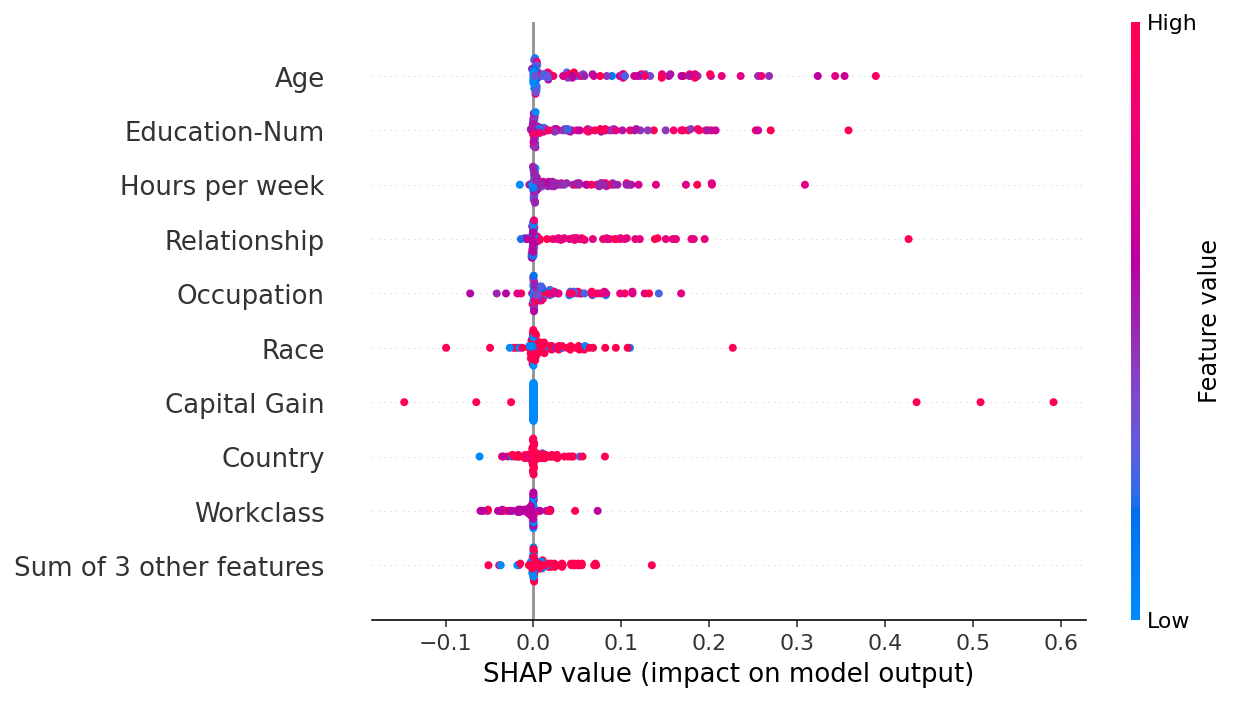

In [1]:
import xgboost
import shap
import numpy as np

# train XGBoost model
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X.values, y)

# A masking function takes a binary mask vector as the first argument and
# the model arguments for a single sample after that
# It returns a masked version of the input x, where you can return multiple
# rows to average over a distribution of masking types
def custom_masker(mask, x):
    return (x * mask).reshape(1,len(x)) # in this simple example we just zero out the features we are masking

# compute SHAP values
explainer = shap.Explainer(model.predict_proba, custom_masker)
shap_values = explainer(X[:100])

# plot the SHAP values for the positive class
shap.plots.beeswarm(shap_values[...,1])

<hr>
Have an idea for more helpful examples? Pull requests that add to this documentation notebook are encouraged! 